In [1]:
import cv2
import numpy as np
import datetime
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

dpi = matplotlib.rcParams['figure.dpi']

In C:\WPy64-3760\python-3.7.6.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\WPy64-3760\python-3.7.6.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\WPy64-3760\python-3.7.6.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\WPy64-3760\python-3.7.6.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\WPy64-3760\python-3.7.6.amd64\lib\site-packages\matplo

In [23]:
vid_capture = cv2.VideoCapture('Long War WotC - Legend Ironman - 29_07_2021.mp4')
template = cv2.imread('template4.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
# template = cv2.cvtColor(template,cv2.COLOR_RGB2GRAY)
dimensions = template.shape

# height, width, number of channels in image
h = template.shape[0]
w = template.shape[1]

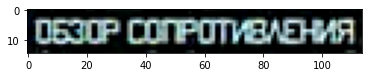

In [24]:
# height, width, depth = template.shape

plt.imshow(template)
plt.show()

In [25]:
i = 1

while(vid_capture.isOpened()):
    ret, frame = vid_capture.read()
    if ret == False:
        break
    
    res = cv2.matchTemplate(frame, template, cv2.TM_SQDIFF_NORMED)
    
    loc = np.where(res <= 0.35)
    
    for pt in zip(*loc[::-1]):
        if pt[0] > 0 and pt[1] > 0:
#             cv2.imwrite('kang'+str(i)+'.jpg',frame)
#             i+=1
            milliseconds = vid_capture.get(cv2.CAP_PROP_POS_MSEC)

            seconds = milliseconds//1000
            milliseconds = milliseconds%1000
            minutes = 0
            hours = 0
            if seconds >= 60:
                minutes = seconds//60
                seconds = seconds % 60

            if minutes >= 60:
                hours = minutes//60
                minutes = minutes % 60

            print(int(hours), int(minutes), int(seconds), int(milliseconds))
            
# Release the objects
vid_capture.release()
cv2.destroyAllWindows()

0 1 50 866
0 1 50 899
0 1 50 933
0 1 51 0
0 1 51 33
0 1 51 100
0 1 51 133
0 1 51 133
0 1 51 166
0 1 51 166
0 1 51 200
0 1 51 233
0 1 51 266
0 1 51 300
0 1 51 333
0 1 51 366
0 1 51 399
0 1 51 433
0 1 51 466
0 1 51 500
0 1 51 533
0 1 51 566
0 1 51 600
0 1 51 633
0 1 51 666
0 1 51 700
0 1 51 733
0 1 51 766
0 1 51 800
0 1 51 833
0 1 51 866
0 1 51 899
0 1 51 933
0 1 51 966
0 1 52 0
0 1 52 33
0 1 52 66
0 1 52 100
0 1 52 133
0 1 52 166
0 1 52 200
0 1 52 233
0 1 52 266
0 1 52 300
0 1 52 333
0 1 52 366
0 1 52 399
0 1 52 433
0 1 52 466
0 1 52 500
0 1 52 533
0 1 52 566
0 1 52 600
0 1 52 633
0 1 52 666
0 1 52 700
0 1 52 733
0 1 52 766
0 1 52 800
0 1 52 833
0 1 52 866
0 1 52 899
0 1 52 933
0 1 52 966
0 1 53 0
0 1 53 33
0 1 53 66
0 1 53 100
0 1 53 133
0 1 53 166
0 1 53 200
0 1 53 233
0 1 53 266
0 1 53 300
0 1 53 333
0 1 53 366
0 1 53 399
0 1 53 433
0 1 53 466
0 1 53 500
0 1 53 533
0 1 53 566
0 1 53 600
0 1 53 633
0 1 53 666
0 1 53 700
0 1 53 733
0 1 53 766
0 1 53 800
0 1 53 833
0 1 55 266
0 1 55 633

KeyboardInterrupt: 

In [19]:
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    ret, frame = vid_capture.read()
#     frame = imutils.resize(frame, width=400)
    # draw the timestamp on the frame
    timestamp = datetime.datetime.now()
    ts = timestamp.strftime("%A %d %B %Y %I:%M:%S%p")
#     frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(frame, template, cv2.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
#     print(min_val, max_val, min_loc, max_loc)
#     top_left = max_loc
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
#     cv2.rectangle(frame,top_left, bottom_right, 255, 2)
    loc = np.where(res <= 0.35) #THRESHOLD
    for pt in zip(*loc[::-1]):
        cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,255,0), 3)
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
# do a bit of cleanup
vid_capture.release()
cv2.destroyAllWindows()

In [ ]:
while(vid_capture.isOpened()):
# vCapture.read() methods returns a tuple, first element is a bool 
    # and the second is frame

    ret, frame = vid_capture.read()
    frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(frame_gray, template ,cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res>=threshold)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if ret == True:
        cv2.imshow('Frame',frame)
        k = cv2.waitKey(20)
        # 113 is ASCII code for q key
        if k == 113:
            break
    else:
        break

In [26]:
# Release the objects
vid_capture.release()
cv2.destroyAllWindows()